<a href="https://colab.research.google.com/github/GEJ1/web-scraping-python/blob/main/web_scraping_maestria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Web scraping con Python**


#### *Material complementario a la clase dictada por [Gustavo Juantorena](https://github.com/GEJ1) como docente invitado en la materia <b>Text Mining</b> de la  [Maestría en Explotación de Datos y Descubrimiento de Conocimiento](http://datamining.dc.uba.ar/datamining/) de la Universidad de Buenos Aires.*
#### [Slides de la clase](https://docs.google.com/presentation/d/10-lc2Y6kMVHp7FO9v8ReZdY1MPwUlgxWIsSDePY0afg/edit?usp=sharing)

*Las partes del código que no son mias tienen las atribuciones correspondientes*

<hr>
<img src="https://media-exp1.licdn.com/dms/image/C4D22AQEbWowquL3i-g/feedshare-shrink_800/0/1627925346971?e=1631750400&v=beta&t=PiGIewGfPoELGqvqnv4ttgonaFIjo-CM2ufvnljvHK8" width="500" height="auto"/>

# Hoja de ruta


## 1. Pedidos HTTP con **urllib** y **Requests**
## 2. Uso basico de **APIs** 
## 3. Parseo con **Beautiful Soup**
## 4. Intro al web scraping avanzado con **Selenium**






# **Pedidos HTTP con urllib y Requests**

In [ ]:
# Importamos librerias

# Para hacer pedidos mediante el protocolo HTTP 
from urllib import request 

# para trabajar con formato .json
import json

In [ ]:
# Hacemos un pedido a la página de wikipedia
URL = 'https://www.wikipedia.org'

# Guardamos el objeto que nos devuelve
response = request.urlopen(URL)


print(f'Tipo de Objeto: {type(response)} \n')
print(f'Status code: {response.code} \n') 
print(f'Data: {response.read()} \n') 

Tipo de Objeto: <class 'http.client.HTTPResponse'> 

Status code: 200 

Data: b'<!DOCTYPE html>\n<html lang="en" class="no-js">\n<head>\n<meta charset="utf-8">\n<title>Wikipedia</title>\n<meta name="description" content="Wikipedia is a free online encyclopedia, created and edited by volunteers around the world and hosted by the Wikimedia Foundation.">\n<script>\ndocument.documentElement.className = document.documentElement.className.replace( /(^|\\s)no-js(\\s|$)/, "$1js-enabled$2" );\n</script>\n<meta name="viewport" content="initial-scale=1,user-scalable=yes">\n<link rel="apple-touch-icon" href="/static/apple-touch/wikipedia.png">\n<link rel="shortcut icon" href="/static/favicon/wikipedia.ico">\n<link rel="license" href="//creativecommons.org/licenses/by-sa/3.0/">\n<style>\n.sprite{background-image:linear-gradient(transparent,transparent),url(portal/wikipedia.org/assets/img/sprite-e99844f6.svg);background-repeat:no-repeat;display:inline-block;vertical-align:middle}.svg-Commons-logo_si

## También podemos usar la libreria Requests

### Ejemplo de scrapeo de imágenes

In [ ]:
# Importamos
import requests

# defino la URL
image_url = 'https://www.octoparse.com/media/7179/find-data.jpg'

# Hago una peticion y guardo la respuesta
image_response = requests.get(image_url)

# Accedemos al contenido de la imagen en bytes
image_response_content = image_response.content

print(f'Este es el contenido en bytes: \n {image_response_content}')

Este es el contenido en bytes: 
 b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\n\x07\x07\x08\x07\x06\n\x08\x08\x08\x0b\n\n\x0b\x0e\x18\x10\x0e\r\r\x0e\x1d\x15\x16\x11\x18#\x1f%$"\x1f"!&+7/&)4)!"0A149;>>>%.DIC<H7=>;\xff\xdb\x00C\x01\n\x0b\x0b\x0e\r\x0e\x1c\x10\x10\x1c;("(;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;\xff\xc2\x00\x11\x08\x01\x90\x02&\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x01\x04\x03\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x05\x04\x06\x07\x08\xff\xc4\x00\x19\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x00\xd2\xf9D\x11\x01u\xa0L\xe4\x12\r\x81!\xcc\x82*\x88\x80\xaa\x82\x8b\x04\x89\xd0\xb0\x0b\x04\n\xa1\xa8\xb8\x1a\x8bJ$9\xa2\x80\x0c\x85h\x0bt\x90L\x82\x056h\nA\xb3H+(*\xa0\xa2\r\x01\x11\x04i\x08\xab9\x90TD\xc3\xba\x86\xb2\x11\x84BQ\x00R\x0e\x84\n\xca1a\xe5\x8ePi\x86\x85-\xa0\x99\x8a

Esta imagen la bajamos de internet usando Python! 
 


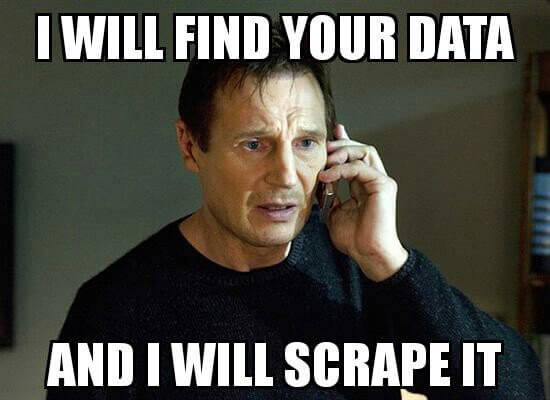

In [ ]:
# Importamos librerias para manejar imagenes (no tienen nada que ver con el scrapeo)
from PIL import Image
from io import BytesIO

# Mostramos la imagen
image_from_url = Image.open(BytesIO(image_response_content))
print('Esta imagen la bajamos de internet usando Python! \n ')
image_from_url

In [ ]:
# Para guardarla
image_from_url.save("image_from_url.png","PNG")

# **Uso basico de APIs** 

### Uso de API de manera directa

[Sunset and sunrise times API](https://sunrise-sunset.org/api)

**Sirve para obtener la hora del amanecer y el ocaso de un determinado día**

*Parametetros:*


*  **lat** (float): Latitude in decimal degrees. Required.
*  **lng** (float): Longitude in decimal degrees. Required.
*  **date** (string): Date in YYYY-MM-DD format. Also accepts other date formats   and even relative date formats. If not present, date defaults to current date. Optional.
* **callback** (string): Callback function name for JSONP response. Optional.
* **formatted** (integer): 0 or 1 (1 is default). Time values in response will be expressed following ISO 8601 and day_length will be expressed in seconds. Optional.

*Estructura de la query:*

`https://api.sunrise-sunset.org/json?`

`lat=36.7201600`

`&`

`lng=-4.4203400`

`&`

`date=2021-07-26`

In [ ]:
# Definimos los parametros de nuestra query
latitud = -34.6
longitud = -58.4
fecha = '1912-12-23' # YYYY-MM-DD

In [ ]:
# Hacemos el pedido y guardamos la respuesta en una nueva variable  
response_sunset = request.urlopen(f'https://api.sunrise-sunset.org/json?lat={latitud}&lng={longitud}&date={fecha}')

In [ ]:
# Para des-serializar el objeto (que era tipo 'HTTPResponse') y cargarlo como json
data_sunset = json.load(response_sunset)   

In [ ]:
# Ver el json en formato lindo
data_sunset_to_string = json.dumps(data_sunset, indent=2)
print(data_sunset_to_string) # Esta en UTC // Buenos Aires es UTC-3



{
  "results": {
    "sunrise": "8:37:04 AM",
    "sunset": "11:08:37 PM",
    "solar_noon": "3:52:50 PM",
    "day_length": "14:31:33",
    "civil_twilight_begin": "8:09:03 AM",
    "civil_twilight_end": "11:36:38 PM",
    "nautical_twilight_begin": "7:32:36 AM",
    "nautical_twilight_end": "12:13:05 AM",
    "astronomical_twilight_begin": "6:52:27 AM",
    "astronomical_twilight_end": "12:53:14 AM"
  },
  "status": "OK"
}
Status: OK 



In [ ]:
#Evaluamos el status del pedido
sunset_status = data_sunset['status']
print(f'Status: {sunset_status} \n')

Status: OK 



In [ ]:
# Podemos ver su contenido como si fuera un diccionario:
sunset = data_sunset['results']['sunset']
print(f'El {fecha} el sol se puso a las {sunset} (UTC)\n')

El 1912-12-23 el sol se puso a las 11:08:37 PM (UTC)



In [ ]:
# tambien podriamos iterar
print("Iterando data_sunset['results']: \n")
for elemento in data_sunset['results']:
  print(elemento)

Iterando data_sunset['results']: 

sunrise
sunset
solar_noon
day_length
civil_twilight_begin
civil_twilight_end
nautical_twilight_begin
nautical_twilight_end
astronomical_twilight_begin
astronomical_twilight_end


<font color='red'>Ejercitación:</font>

* Hagan un pedido a la API utilizando la fecha de su cumpleaños y las coordenadas de su lugar de nacimiento (lo pueden googlear) y calculen cuantas horas de luz hubo ese día (o chequear si era de día cuando nacieron).

*Nota 1*:  La hora viene en formato UTC, eso no va a afectar a esta cuenta, pero dependiende de donde hayan nacido, no va a ser la hora real que figuraba. En Argentina estamos en UTC-3

*Nota 2*: Fijense el tipo de dato con `type()` y recuerden que pueden cambiar strings a número usando por ejemplo `int()`

In [ ]:
# Espacio cedido a les alumnes para que hagan el ejercicio






### Uso de API por medio de una librería: Wikipedia

Wikipedia-API es un wrapper de Python fácil de usar para la API de Wikipedia. Admite la extracción de textos, secciones, enlaces, categorías, traducciones, etc. 

Repositorio: https://github.com/martin-majlis/Wikipedia-API

Documentación: https://wikipedia-api.readthedocs.io/en/latest/README.html






In [5]:
# Instalamos el paquete porque no viene con Colab
!pip3 install wikipedia-api

  Created wheel for wikipedia-api: filename=Wikipedia_API-0.5.4-py3-none-any.whl size=13475 sha256=0730c5325af7e2e39fec42eac0e64027546d500c8a4433396b797501f43821ff
  Stored in directory: /root/.cache/pip/wheels/d3/24/56/58ba93cf78be162451144e7a9889603f437976ef1ae7013d04
Successfully built wikipedia-api


In [6]:
# Ahora si podemos importarlo
import wikipediaapi

In [7]:
# Instanciamos la clase wikipediaapi y utilizamos el metodo Wikipedia con el parametro de idioma
wiki_wiki = wikipediaapi.Wikipedia('es')

# Usamos el metodo page para y hacemos un pedido con una keyword
page_data_mining = wiki_wiki.page('Minería_de_datos')

print(f'page_data_mining es un objeto de tipo: \n \n{type(page_data_mining)}')

page_data_mining es un objeto de tipo: 
 
<class 'wikipediaapi.WikipediaPage'>


In [8]:
# Resumen
page_data_mining.summary

'La minería de datos o exploración de datos (es la etapa de análisis de "Knowledge Discovery in Databases" o KDD) es un campo de la estadística y las ciencias de la computación referido al proceso que intenta descubrir patrones en grandes volúmenes de conjuntos de datos.[1]\u200b[2]\u200b  Utiliza los métodos de la inteligencia artificial, aprendizaje automático, estadística y sistemas de bases de datos. El objetivo general del proceso de minería de datos consiste en extraer información de un conjunto de datos y transformarla en una estructura comprensible para su uso posterior. Además de la etapa de análisis en bruto, supone aspectos de gestión de datos y de bases de datos, de procesamiento de datos, del modelo y de las consideraciones de inferencia, de métricas de intereses, de consideraciones de la teoría de la complejidad computacional, de post-procesamiento de las estructuras descubiertas, de la visualización y de la actualización en línea.\nEl término es un concepto de moda, y es

In [9]:
# Url completa
page_data_mining.fullurl

'https://es.wikipedia.org/wiki/Miner%C3%ADa_de_datos'

In [12]:
# Imprimir las categorias a las que corresponde la pagina con el atributo 'categories' 


categories = page_data_mining.categories
for title in sorted(categories.keys()):
    print("%s: %s" % (title, categories[title]))

Categoría:Análisis de datos: Categoría:Análisis de datos (id: ??, ns: 14)
Categoría:Bases de datos: Categoría:Bases de datos (id: ??, ns: 14)
Categoría:Minería de datos: Categoría:Minería de datos (id: ??, ns: 14)
Categoría:Wikipedia:Artículos con identificadores GND: Categoría:Wikipedia:Artículos con identificadores GND (id: ??, ns: 14)
Categoría:Wikipedia:Artículos con identificadores LCCN: Categoría:Wikipedia:Artículos con identificadores LCCN (id: ??, ns: 14)
Categoría:Wikipedia:Artículos con identificadores Microsoft Academic: Categoría:Wikipedia:Artículos con identificadores Microsoft Academic (id: ??, ns: 14)
Categoría:Wikipedia:Artículos que necesitan referencias adicionales: Categoría:Wikipedia:Artículos que necesitan referencias adicionales (id: ??, ns: 14)
Categoría:Wikipedia:Páginas con enlaces mágicos de ISBN: Categoría:Wikipedia:Páginas con enlaces mágicos de ISBN (id: ??, ns: 14)
Categoría:Wikipedia:Referenciar (aún sin clasificar): Categoría:Wikipedia:Referenciar (aún s

In [15]:
def print_categorymembers(categorymembers, level=0, max_level=1):
        for c in categorymembers.values():
            print("%s: %s (ns: %d)" % ("*" * (level + 1), c.title, c.ns))
            if c.ns == wikipediaapi.Namespace.CATEGORY and level < max_level:
                print_categorymembers(c.categorymembers, level=level + 1, max_level=max_level)


cat = wiki_wiki.page("Categoría:Análisis de datos")
# print("Category members: Category:Physics")
print_categorymembers(cat.categorymembers)

*: Alexa Internet (ns: 0)
*: Análisis de datos (ns: 0)
*: Aleatoriedad espacial completa (ns: 0)
*: Alisado (ns: 0)
*: Análisis de frecuencia acumulada (ns: 0)
*: Análisis de viabilidad (ns: 0)
*: Análisis de componentes independientes (ns: 0)
*: Análisis exploratorio de datos (ns: 0)
*: Análisis predictivo (ns: 0)
*: Analyst's Notebook (ns: 0)
*: Codificación disyuntiva completa (ns: 0)
*: Datos oscuros (ns: 0)
*: DBSCAN (ns: 0)
*: Desviación estándar geométrica (ns: 0)
*: Desviación típica (ns: 0)
*: Detección automática de fraude (ns: 0)
*: Diagrama de dispersión (ns: 0)
*: Estadística robusta (ns: 0)
*: Función probit (ns: 0)
*: Fusión de datos (ns: 0)
*: Fuzzy clustering (ns: 0)
*: Gran media (ns: 0)
*: I de Moran (ns: 0)
*: Iconografía de las correlaciones (ns: 0)
*: Imputación (estadística) (ns: 0)
*: Interacción lógica (ns: 0)
*: Maltego (ns: 0)
*: Mapeo predictivo (ns: 0)
*: Matriz multirrasgo-multimétodo (ns: 0)
*: Media móvil (ns: 0)
*: Minería de datos (ns: 0)
*: Modelo de 

# **BeautifulSoup**

## Generalidades

In [2]:
from bs4 import BeautifulSoup
import requests

# Vamos a jugar un poco con la pagina de Exactas
url_base = 'https://exactas.uba.ar/'
endpoint_calendario = 'calendario-academico/'
html_obtenido = requests.get(url_base+endpoint_calendario)
soup = BeautifulSoup(html_obtenido.text, "lxml")
print(type(soup))
# print(soup)
# print(soup.prettify())

<class 'bs4.BeautifulSoup'>


In [3]:
# Si queremos quedarnos con un tag

# El método "find" busca el primer elemento de la pagina con ese tag
primer_h3 = soup.find('h3')
print(primer_h3)

<h3>CURSO DE VERANO 2021 (7 semanas)</h3>


In [4]:
# El método "find_all" busca TODOS los elementos de la pagina con ese tag y devuelve una lista que los contiene (en realidad devuelve un objeto de la clase "bs4.element.ResultSet")
h3_todos = soup.find_all('h3')
print(h3_todos)

[<h3>CURSO DE VERANO 2021 (7 semanas)</h3>, <h3>INSCRIPCIÓN PRIMER CUATRIMESTRE 2021</h3>, <h3>EXÁMENES DE FEBRERO-MARZO 2021</h3>, <h3>PRIMER BIMESTRE 2021 (8 semanas)</h3>, <h3>SEGUNDO BIMESTRE 2021 (8 semanas)</h3>, <h3>CURSO DE INVIERNO 2021</h3>, <h3>INSCRIPCIÓN SEGUNDO CUATRIMESTRE 2021</h3>, <h3>INSCRIPCIÓN A DOCTORADO 2021</h3>, <h3>SEMANAS DE LAS CIENCIAS</h3>, <h3>ACTOS DE COLACIÓN DE GRADO Y POSGRADO</h3>, <h3><strong>FERIADOS</strong></h3>, <h3 class="widget-title"><a href="https://exactas.uba.ar/agenda/">Agenda →</a></h3>]


In [ ]:
# podemos iterar sobre el objeto
for fecha in h3_todos[:-1]:
  # Extraemos el texto que se encuentra dentro del tag
  print(fecha.text)

CURSO DE VERANO 2021 (7 semanas)
INSCRIPCIÓN PRIMER CUATRIMESTRE 2021
EXÁMENES DE FEBRERO-MARZO 2021
PRIMER BIMESTRE 2021 (8 semanas)
SEGUNDO BIMESTRE 2021 (8 semanas)
CURSO DE INVIERNO 2021
INSCRIPCIÓN SEGUNDO CUATRIMESTRE 2021
INSCRIPCIÓN A DOCTORADO 2021
SEMANAS DE LAS CIENCIAS
ACTOS DE COLACIÓN DE GRADO Y POSGRADO
FERIADOS


In [ ]:
# Busco por clase, escribo class_ porque "class" es una palabra reservada en Python
eventos_proximos = soup.find('aside', class_ = 'widget_my_calendar_upcoming_widget')
for evento in eventos_proximos:
  print(evento.text)

Agenda →

17 agosto, 2021,  : Curso de actualización en el uso de animales en experimentación  | + INFO
17 agosto, 2021,  : Cursos de idiomas  | + INFO
17 agosto, 2021,  : Programa de Tutorías para estudiantes iniciales de Exactas  | + INFO
18 agosto, 2021,  : Talleres de idiomas  | + INFO
18 agosto, 2021, 11.00: Capacitación "Precursores Químicos SEDRONAR”  | + INFO
18 agosto, 2021, 11.00: Ciclo de charlas "El tema del litio de la Puna argentina, enfoque multidisciplinario a la luz de la geología"  | + INFO




In [ ]:
# Todos los links. Esto podría ser útil para seguir scrapeando todo el sitio haciendo requests en ellos
a_todos = soup.find_all('a', href=True)
for a in a_todos:
  print(f"{a.text}: {a['href']}")

In [ ]:
# Podemos tambien scrapear un tabla y traernos los feriados
tabla_feriados = soup.find_all('td')

# Con 'attr' podemos acceder a cualquier atributo de a etiqueta usando un diccionario
dias = soup.find_all('td', attrs={'style':'width: 74px;'}) 
fechas = soup.find_all('td', attrs={'style':'width: 127px;'}) 
eventos = soup.find_all('td', attrs={'style':'width: 438px;'}) 
# print(tabla_feriados)

for pos in range(len(dia)):
  print(f" Dia: {dias[pos].text.strip()} | fecha: {fechas[pos].text.strip()} | evento: {eventos[pos].text.strip()} ")

 Dia: Viernes | fecha: 1 de enero | evento: Año Nuevo 
 Dia: Lunes | fecha: 15 de febrero | evento: Carnaval 
 Dia: Martes | fecha: 16 de febrero | evento: Carnaval 
 Dia: Miércoles | fecha: 24 de marzo | evento: Día Nacional de la Memoria por la Verdad y la Justicia 
 Dia: Domingo | fecha: 28 de marzo | evento: Pascua Judía 
 Dia: Lunes | fecha: 29 de marzo | evento: Pascua Judía 
 Dia: Jueves | fecha: 1 de abril | evento: Jueves Santo 
 Dia: Viernes | fecha: 2 de abril | evento: Viernes Santo y Día del Veterano y de los Caídos en la Guerra de Malvinas 
 Dia: Sábado | fecha: 3 de abril | evento: Pascua Judía 
 Dia: Domingo | fecha: 4 de abril | evento: Pascua Judía 
 Dia: Sábado | fecha: 24 de abril | evento: Día de Acción por la Tolerancia y el Respeto entre los Pueblos 
 Dia: Sábado | fecha: 1 de mayo | evento: Día del Trabajador 
 Dia: Jueves | fecha: 13 de mayo | evento: Fiesta de la Ruptura del Ayuno del Sagrado Mes de Ramadán 
 Dia: Lunes | fecha: 24 de mayo | evento: Feriado co

In [ ]:
# Última actualización

# No es necesario todo este choclo de selector, hubiera alcanzado con #post-256
ultima_actualizacion = soup.select('#post-256 > div.entry-content > p:nth-of-type(1)') 
ultima_actualizacion= ultima_actualizacion[0].text

# print(ultima_actualizacion)

# Para exprresiones regulares
import re
# Para manejo de fechas
from datetime import datetime

# Expresion que busca algo del estilo x/x/xxxx (donde x es un número)
match = re.search(r'\d{1}/\d{1}/\d{4}', ultima_actualizacion)
fecha = match.group()



fecha_datetime = datetime.strptime(fecha, '%d/%m/%Y').date()

print(f"Última actualización: {fecha_datetime.day}/{fecha_datetime.month}/{fecha_datetime.year} ")


<font color='red'>Ejercitación:</font>

* Generar diccionario cuyas claves sean los nombres de las carreras de posgrado vigentes en Exactas y sus valores el link asociado a cada una de ellas. https://exactas.uba.ar/ensenanza/carreras-de-posgrado/

**¡A trabajar!**

<img src="https://img.icons8.com/ios/452/spade.png" width="80" height="auto"/>


In [ ]:
# Espacio para el ejercicio




In [ ]:
#@title Resolución

url = 'https://exactas.uba.ar/ensenanza/carreras-de-posgrado/'

html_obtenido = requests.get(url)
soup = BeautifulSoup(html_obtenido.text, "lxml")
print(type(soup))

titulos = soup.find_all('h2', class_ = 'titulo')
page_links = soup.find_all('a', attrs={'title': "Ir al Sitio web"}, href= True) 

lista_titulos = []
lista_paginas = []

for i, titulo in enumerate(titulos):
  # print(page_links[i]['href'])
  if titulo != '' and page_links[i]['href'] != '':
    lista_titulos.append(titulo.text) 
    lista_paginas.append(page_links[i]['href'])

diccionario_posgrado = dict(zip(lista_titulos, lista_paginas))

diccionario_posgrado

## **Vamos a scrapear las novedades de Goodreads.com**
<hr>
<img src='https://digital.hbs.edu/platform-digit/wp-content/uploads/sites/2/2015/10/goodreads-620x200.png'>


In [26]:
from bs4 import BeautifulSoup
import requests
import json
import time
import re # SI NO LO USO SACARLO
import pandas as pd
 
 
 
def goodreads_scraper(base_url, url_category):
  '''
  Scraper de libros de resumenes de libros que aparecen como 'New realeases' en GoodReads
 
  parameters:
            url_category  - String conteniendo una URL del tipo ' https://www.goodreads.com/genres/new_releases/{CATEGORIA} ' 
            base_url - String conteniendo la URL base de Goodreads. Actualmente: 'https://www.goodreads.com'
 
  return:
            titulos       - Lista de strings con los titulos de los libros correspondientes a la categoria 
            resumenes     - Lista de strings con los resumenes de los libros correspondientes a la categoria 
            df            - Pandas Dataframe cuyos índices son los títulos de los libros y cuya única columna contiene los resúmenes
 
  '''
 
  # Inicializo las listas
  resumenes = []
  titulos = []
 
  # Pedido a la URL con todos los libros
  req_general = requests.get(url_category)
  print(f"URL de categoria: {url_category} \nStatus code: {req_general.status_code}")
 
  #Parseo instanciando un objeto de BeautifulSoup
  soup_general = BeautifulSoup(req_general.text, "lxml") 
 
  # Busco los div de cada libro
  paging = soup_general.find_all("div",{'class':'coverWrapper'})
 
  for i in range(len(paging)):
    # Busco los links a cada libro de la categoria
    paging_link = paging[i].find_all('a', href=True)
    book_id = paging_link[0]['href']
 
    # Pedido a la URL de un libro especifico
    req_book = requests.get(base_url+str(book_id))
    print(f"URL de libro: {base_url+str(book_id)} \nStatus code: {req_book.status_code}")
    
    # Parseo
    soup_book = BeautifulSoup(req_book.text, "lxml") 
    # Extraigo titulo con control de excepciones
    try:
      title = soup_book.find("h1", {"id": "bookTitle"}).text.strip()
      print(f"El titulo es: '{title}' \n")
      titulos.append(title)
    except:
      print('No hay titulo \n')
      titulos.append('No hay titulo')
    
    # Resumenes 
    for i in soup_book.find_all("div", {"id": "description"}):
      # ¿Se les ocurre como emprolijar esta búsqueda? 
      span_data = i.find_all('span', id=lambda x: x and x.startswith(('freeText1','freeText2','freeText3','freeText4','freeText5','freeText6','freeText7','freeText8','freeText9','freeText0')))
      # span_data = i.find_all(re.compile("\d"))
      for resumen in span_data:
        # Extraigo resumen con control de excepciones
        try:
          resumen = resumen.text.strip()
          
          print(f'Resumen: {resumen}')
 
          resumenes.append(resumen)
        except:
          print('No hay resumen')
          resumenes.append('No hay resumen')
    
    # Armo diccionario con clave = titulo y valor = resumen
    diccionario_resumenes = dict(zip(titulos,resumenes))
 
    # Armo un Pandas Dataframe en base al diccionario
    df = pd.DataFrame(diccionario_resumenes, index=['Resumenes'])
    # Transpongo filas y columnas
    df = df.T
  
  return titulos, resumenes, df
 
# Documentacion
print(f'Documentacion de nuestra función: \n {goodreads_scraper.__doc__} \n')


Documentacion de nuestra función: 
 
  Scraper de libros de resumenes de libros que aparecen como 'New realeases' en GoodReads
 
  parameters:
            url_category  - String conteniendo una URL del tipo ' https://www.goodreads.com/genres/new_releases/{CATEGORIA} ' 
            base_url - String conteniendo la URL base de Goodreads. Actualmente: 'https://www.goodreads.com'
 
  return:
            titulos       - Lista de strings con los titulos de los libros correspondientes a la categoria 
            resumenes     - Lista de strings con los resumenes de los libros correspondientes a la categoria 
            df            - Pandas Dataframe cuyos índices son los títulos de los libros y cuya única columna contiene los resúmenes
 
   



In [27]:
category = 'Biography'
url_category = f'https://www.goodreads.com/genres/new_releases/{category}'
base_url = 'https://www.goodreads.com'


t1 = time.perf_counter()
titulos, resumenes, df = goodreads_scraper(base_url, url_category)
t2 = time.perf_counter()
print('\n\n\n\n')
print('Tiempo de ejecución:',t2-t1)

URL de categoria: https://www.goodreads.com/genres/new_releases/Biography 
Status code: 200
URL de libro: https://www.goodreads.com/book/show/55825273-the-comfort-book 
Status code: 200
El titulo es: 'The Comfort Book' 

Resumen: A small book for anyone in search of hope, looking for a path to a more meaningful life, or in need of encouragement.



Happiness occurs when you forget who you're expected to be. And what you're expected to do. Happiness is an accident of self-acceptance. It's the warm breeze you feel when you open the door to who you are.
Years ago, Matt Haig began writing notes to his future self. These notes were meant as gifts to his future self: offerings of hope to help himself through anything from the darkest periods of his life to a not-so-great day. As time went on, he added new thoughts and stories, and he turned them into The Comfort Book so that everyone could draw on this well of reassurance and encouragement. Each of its short meditations gives a new perspecti

In [ ]:
# veamos el dataframe
display(df.head(15))

# Veamos una entrada
primer_libro  = df.index[0]
print(f" \n Resumen de '{primer_libro}':  \n")

# Veamos el primer libro 
# df.loc[primer_libro]['Resumenes']


df.iloc[20]['Resumenes']

,Resumenes
The Comfort Book,"A small book for anyone in search of hope, loo..."
Fox & I,"A solitary woman’s inspiring, moving, surprisi..."
The Case of the Murderous Dr. Cream: The Hunt for a Victorian Era Serial Killer,“Jobb’s excellent storytelling makes the book ...
Stolen: A Memoir,A gripping chronicle of psychological manipula...
"The Sunset Route: Freight Trains, Forgiveness, and Freedom on the Rails in the American West",The unforgettable story of one woman who leave...
"Trejo: My Life of Crime, Redemption, and Hollywood","For the first time, the full, fascinating, and..."
Carry On: Reflections for a New Generation,A brilliant and empowering collection of final...
Bring Your Baggage and Don't Pack Light: Essays,The bestselling author of American Housewife a...
Golden Boy: A Murder Among the Manhattan Elite,"In Golden Boy, New York Times bestselling auth..."
I Have Always Been Me: A Memoir,"A powerful memoir of independence, releasing t..."


 
 Resumen de 'The Comfort Book':  



'Arif Naqvi was charismatic, inspiring, and self-made—all the qualities of a successful business leader. The founder of Abraaj, a Dubai-based private-equity firm, Naqvi was the Key Man to the global elite searching for impact investments to make money and do good. He persuaded politicians he could help stabilize the Middle East after 9/11 by providing jobs and guided executives to opportunities in cities they struggled to find on the map. Bill Gates helped him start a $1 billion fund to improve healthcare in poor countries and the UN and Interpol appointed him to boards. As Pope Francis blessed a move to harness capitalism for the good of the poor, Naqvi won the support of Obama’s administration and investors, who compared him to Tom Cruise in Mission: Impossible.In 2018, Simon Clark and Will Louch were contacted by an anonymous whistleblower who said Naqvi had swindled investors out of hundreds of millions of dollars and offered bribes to sustain his billionaire lifestyle. Digging int

## Si se coparon mucho pueden hacer un mega scrapeo iterando sobre algunas de las categorias
 
### **Tip para que no les raje colab:**
* En la consola del navegador pegan esto y le dan enter:



```javascript

// Código en JavaScript
function ClickConnect() {
  console.log('Trabajando...')
  document
    .querySelector('#top-toolbar > colab-connect-button')
    .shadowRoot.querySelector('#connect')
    .click()
}
intervalTiming = setInterval(ClickConnect, 60000)
```
 
Para desactivarlo: 
 
```javascript
clearInterval(intervalTiming)
```
 
 
 
 
 
<img src='https://bookbub-res.cloudinary.com/image/upload/f_auto,q_auto/v1584035706/blog/justification-for-too-many-books-memes-we-need-more-books.jpg'>

In [ ]:
import time
 
diccionario_de_dataframes = dict()
categories = [
              'Art',
              'Biography',
              'Business',
              "Chick Lit",
              "Children's",
              'Christian',
              'Classics',
              'Comics',
              'Contemporary',
              'Cookbooks',
              'Crime',
              'Ebooks',
              'Fantasy',
              'Fiction',
              'Graphic Novels',
              'Historical Fiction',
              'History',
              'Horror',
              'Humor and Comedy',
              'Manga',
              'Memoir',
              'Music',
              'Mystery',
              'Nonfiction',
              'Paranormal',
              'Philosophy',
              'Poetry',
              'Psychology',
              'Religion',
              'Romance',
              'Science',
              'Science Fiction',
              'Self Help',
              'Suspense',
              'Spirituality',
              'Sports',
              'Thriller',
              'Travel',
              'Young Adult'
              ]
 
for cat in categories:
  # time.sleep(10) 
  category = cat
  print(category)
  try:
    url_category = f'https://www.goodreads.com/genres/new_releases/{category}'
    base_url = 'https://www.goodreads.com'
 
 
    t1 = time.perf_counter()
    titulos, resumenes, df = goodreads_scraper(base_url, url_category)
    t2 = time.perf_counter()
    diccionario_de_dataframes[f'{cat}'] = df
    print('\n\n\n\n')
    print('Tiempo de ejecución:',t2-t1)
  except:
    print(f'{cat}: Categoria no encontrada')

Art
URL de categoria: https://www.goodreads.com/genres/new_releases/Art 
Status code: 200
URL de libro: https://www.goodreads.com/book/show/55835474-nightbitch 
Status code: 200
El titulo es: 'Nightbitch' 

Resumen: One day, the mother was a mother but then, one night, she was quite suddenly something else...At home full-time with her two-year-old son, an artist finds she is struggling. She is lonely and exhausted. She had imagined - what was it she had imagined? Her husband, always travelling for his work, calls her from faraway hotel rooms. One more toddler bedtime, and she fears she might lose her mind.Instead, quite suddenly, she starts gaining things, surprising things that happen one night when her child will not sleep. Sharper canines. Strange new patches of hair. New appetites, new instincts. And from deep within herself, a new voice...With its clear eyes on contemporary womanhood and sharp take on structures of power, Nightbitch is an outrageously original, joyfully subversive

#**Web scraping avanzado con Selenium**



In [29]:
# Primeros pasos con Selenium en Google Colab. Fuente: Academia https://scraping.link/ Youtube: https://youtu.be/VdwcTlQRt7w
# Ver tambien https://stackoverflow.com/questions/51046454/how-can-we-use-selenium-webdriver-in-colab-research-google-com
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver

     |████████████████████████████████| 904 kB 8.3 MB/s 
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:14 http://ppa.launchpad.net

In [89]:
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
options = webdriver.ChromeOptions() # Usamos chrome, se podria usar otro.
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')


# Configuramos el web driver
wd = webdriver.Chrome('chromedriver',options=options)

url = "https://www.wikipedia.com" 

# Hacemos el pedido a la URL
wd.get(url)
l = wd.find_element_by_css_selector("h1")
print(f'H1 extraido de wikipedia: \n{l.text}')

H1 extraido de wikipedia: 
Wikipedia
The Free Encyclopedia


In [90]:
# Tiempo  de espera ( si encuentra antes, no espera)
wd.implicitly_wait(20)

# Busco el boton de wikipedia en español
boton_wiki_esp = wd.find_element_by_id('js-link-box-es')

# Le hago click
boton_wiki_esp.click()

hello_wiki = wd.find_element_by_id('Bienvenidos_a_Wikipedia,')
main_article = wd.find_element_by_id('main-tfa')

print(f'Texto de bienvenida:\n {hello_wiki.text}\n')
print(f'Texto del articulo destacado:\n{main_article.text}')

Texto de bienvenida:
 Bienvenidos a Wikipedia,

Texto del articulo destacado:
Artículo destacado
Cristalografía de rayos X
Proceso de determinación de la estructura de una molécula por cristalografía de rayos X.
La cristalografía de rayos X es una técnica experimental para el estudio y análisis de materiales, basada en el fenómeno de difracción de los rayos X por sólidos en estado cristalino.
Los rayos X son difractados por los electrones que rodean los átomos por ser su longitud de onda del mismo orden de magnitud que el radio atómico. El haz de rayos X emergente tras esta interacción contiene información sobre la posición y tipo de átomos encontrados en su camino. Los cristales, gracias a su estructura periódica, dispersan elásticamente los haces de rayos X en ciertas direcciones y los amplifican por interferencia constructiva, originando un patrón de difracción. Existen varios tipos de detectores especiales para observar y medir la intensidad y posición de los rayos X difractados, y

In [91]:
# El input del formulario de busqueda

search_input = wd.find_element_by_id('searchInput')

# El boton de busqueda
search_button = wd.find_element_by_id('searchButton')

# Envio el texto que quiero que ponga en el formulario
search_input.send_keys('Procesamiento del lenguaje natural')

#Hago click
search_button.click()

# Imprimo el título de la página a la que se accedió
heading = wd.find_element_by_id("firstHeading")
print(f'Heading: \n{heading.text}') 

In [ ]:
# Imprimo el cuerpo de texto de la página a la que se accedió
parrafo = wd.find_element_by_class_name("mw-parser-output")
print(f'Heading: \n{parrafo.text}')

### Las posibilidades son enormes!

#### Básicamente podemos recorrer cualquier pagina web clickeando, scrolleando , completando formularios o lo que sea usando Python y con posibilidad de automatizarlo completamente.

Algunos ejemplos más:

```python
# Para ir al final de un documento: https://stackoverflow.com/questions/20986631/how-can-i-scroll-a-web-page-using-selenium-webdriver-in-python
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

# Diferentes formas de seleccionar un elemento
element = driver.find_element_by_id("passwd-id")
element = driver.find_element_by_name("passwd")
element = driver.find_element_by_xpath("//input[@id='passwd-id']")
element = driver.find_element_by_css_selector("input#passwd-id")
```